<a href="https://colab.research.google.com/github/gtsagkatakis/OptimizationMethods_2023/blob/main/573_GA_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# Define the problem
weights = np.array([2, 3, 4, 5, 9, 7, 6, 2, 1, 5])  # Example: 10 item weights
values = np.array([3, 4, 8, 8, 10, 6, 7, 3, 2, 5])  # Example: 10 item values
max_weight = 20

# GA parameters
population_size = 10
num_generations = 100
crossover_rate = 0.7
mutation_rate = 0.1
tournament_size = 3

In [132]:
# Fitness function
def fitness(chromosome):
    total_weight = np.sum(chromosome * weights)
    total_value = np.sum(chromosome * values)
    if total_weight <= max_weight:
        return total_value
    else:
        return 0

# Tournament selection
def tournament_selection(population, fitness_values, tournament_size):
    selected = []
    for _ in range(len(population)):
        participants = np.random.choice(len(population), tournament_size, replace=False)
        best_idx = participants[np.argmax(fitness_values[participants])]
        selected.append(population[best_idx])
    return np.array(selected)

# Single-point crossover
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1))
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
        return child1, child2
    else:
        return parent1, parent2

# Mutation
def mutation(chromosome):
    for i in range(len(chromosome)):
        if np.random.rand() < mutation_rate:
            chromosome[i] = 1 - chromosome[i]
    return chromosome



In [133]:
show_res=False

np.random.seed(1)

# Initialize population
population = np.random.randint(0, 2, (population_size, len(weights)))

# Track the best fitness in each generation for plotting
best_fitness = []
#curr_weight=np.zeros([population_size,1])

# Genetic Algorithm
for generation in range(num_generations):
    fitness_values = np.array([fitness(chromosome) for chromosome in population])
    best_fitness.append(max(fitness_values))


    if show_res==True:
      print("Generation:",generation)
      print("chromosome","fitness","weight")
      for i in range(population_size):
        chromosome_i=population[i,:]
        curr_weight=np.sum(chromosome_i * weights)
        curr_fit=fitness(chromosome_i)
        print(chromosome_i,curr_fit,curr_weight)
      print()

    # Selection
    selected = tournament_selection(population, fitness_values, tournament_size)

    # Crossover
    children = []
    for i in range(0, population_size, 2):
        child1, child2 = crossover(selected[i], selected[i + 1])
        children.append(child1)
        children.append(child2)

    # Mutation
    new_population = np.array([mutation(chromosome) for chromosome in children])
    population = new_population




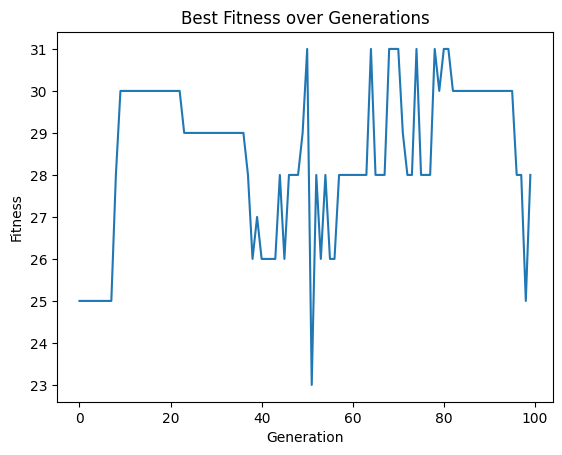

In [134]:
#print(new_population,fitness_values)
# Plot the fitness over generations
plt.plot(best_fitness)
plt.title('Best Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [135]:
print("chromosome","fitness","weight")
for i in range(population_size):
  chromosome_i=population[i,:]
  curr_weight=np.sum(chromosome_i * weights)
  curr_fit=fitness(chromosome_i)
  print(chromosome_i,curr_fit,curr_weight)
print()

chromosome fitness weight
[0 0 1 1 0 0 0 0 1 1] 23 15
[1 0 0 0 0 0 1 1 1 0] 15 11
[1 1 1 1 0 0 0 0 0 1] 28 19
[1 1 0 0 0 0 0 1 0 1] 15 12
[1 1 0 1 0 0 0 1 1 0] 20 13
[1 1 1 0 0 0 0 0 0 1] 20 14
[1 1 1 0 1 0 0 1 0 1] 0 25
[1 1 1 0 0 0 0 1 0 1] 23 16
[0 0 1 0 0 0 1 1 1 0] 20 13
[1 1 1 0 1 0 0 1 1 0] 0 21

